In [1]:
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
data = pd.DataFrame({
    "y": np.random.normal(size=50),
    "g": np.random.choice(["Yes", "No"], size=50),
    "x1": np.random.normal(size=50),
    "x2": np.random.normal(size=50)
})

In [6]:
model = bmb.Model("y ~ x1 + x2", data)
fitted = model.fit()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, x1, x2, y_sigma]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


In [7]:
az.summary(fitted)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.090,0.136,-0.181,0.337,0.002,0.002,5796.0,2842.0,1.0
x1,0.067,0.125,-0.176,0.299,0.001,0.002,7025.0,3321.0,1.0
x2,-0.030,0.124,-0.261,0.201,0.002,0.002,5194.0,3502.0,1.0
y_sigma,0.950,0.097,0.772,1.131,0.001,0.001,5263.0,3107.0,1.0


In [9]:
idata = az.load_arviz_data("centered_eight")
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

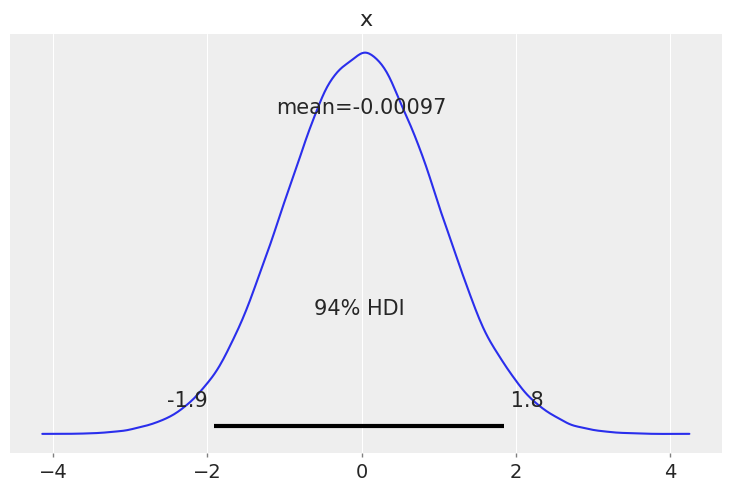

In [3]:
# ArviZ ships with style sheets!
az.style.use("arviz-darkgrid")
az.plot_posterior(np.random.randn(100_000));

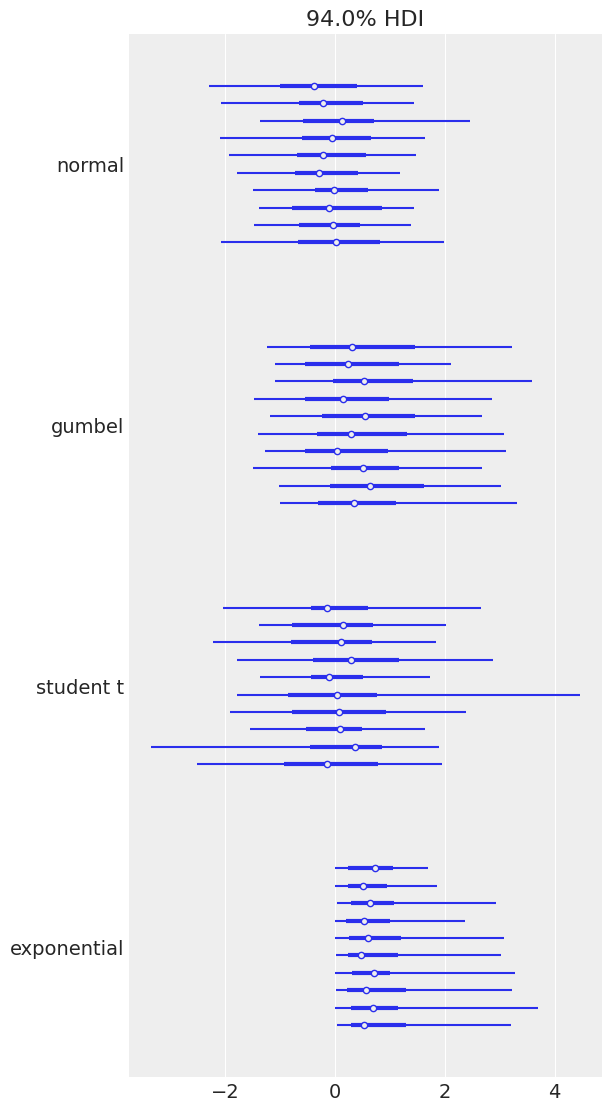

In [4]:
size = (10, 50)
az.plot_forest(
    {
        "normal": np.random.randn(*size),
        "gumbel": np.random.gumbel(size=size),
        "student t": np.random.standard_t(df=6, size=size),
        "exponential": np.random.exponential(size=size),
    }
);